### 1、最基础的，引入pandas并重命名为pd

In [7]:
import pandas as pd

### DataFrame 基础
#### 2、将字典转换为pands数据

In [ ]:
dic= {
    'math': [99,56,60],
    'chinese': [69,66,90],
    'sports' : [99, 88, 82]
}
labels = ['a', 'b', 'c']   #指定行名，其实可以不指认，这样的话就是默认的0,1,2.。。。。。
df = pd.DataFrame(dic,index=labels)
df

#### 3、显示Dataframe上数据的基础信息

In [8]:
df.describe()  # 提供汇总数据统计

# or

df.info()  # 打印DataFrame的简要摘要

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   math     3 non-null      int64
 1   chinese  3 non-null      int64
 2   sports   3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


#### 4、返回前n行数据

In [9]:
n = 5
df.head(n)

,math,chinese,sports
a,99,69,99
b,56,66,88
c,60,90,82


#### 5、只选择数据中的math 和 chinese列

In [12]:
df[['math','chinese']]

,math,chinese
a,99,69
b,56,66
c,60,90


#### 6、选择math 和 chinese 列中的第 1、3行数据

In [17]:
df.loc[['a','c'],['math','chinese']]

# or.....        #上面是直接写行名，下面则是通过行数来导出行名

df.loc[df.index[[0,2]],['math','chinese']]

,math,chinese
a,99,69
c,60,90


#### 7、选择math列中大于等于60的行

In [27]:
df[(df['math']>=60)]

,math,chinese,sports
a,99,69,99
c,60,90,82


#### 8、选择math列中大于等于60， chines列大于80 的行

In [28]:
df[(df['math']>=60) & (df['chinese']>80)]

,math,chinese,sports
c,60,90,82


#### 9、选择math的数值在40-70的行

In [30]:
df[df['math'].between(40,70)]

,math,chinese,sports
b,56,66,88
c,60,90,82


#### 10、将第二行的math数值改为99

In [32]:
df.loc['b','math'] = 99    # 可以看出loc函数用一个[]包裹，第一个参数是行，第二个参数是列。
df

,math,chinese,sports
a,99,69,99
b,99,66,88
c,60,90,82


#### 11、计算math列的sum

In [34]:
df['math'].sum()

258

#### 12、计算不同性别的数学平均分(以性别分组计算数学的平均分)

In [20]:
df = pd.DataFrame([['a', 'man', 120, 90],
                   ['b', 'woman', 130, 100],
                   ['a', 'man', 110, 108],
                   ['a', 'woman', 120, 118]], columns=['level', 'gender', 'math','chinese'])

# 分组就是groupby方法。将DataFrame中所有行按照一列或多列来划分，分为多个组，列值相同的在同一组，列值不同的在不同组。
# 像本题中以gender分组，gender相同的都在一起，然后进行后续操作
df.groupby('gender')['math'].mean()

gender
man      115.0
woman    125.0
Name: math, dtype: float64

#### 13、添加一个新行，并赋值，然后再删除此行

In [22]:
df.loc[4] = ['b','man',112,102]
df
df = df.drop(4)
df

,level,gender,math,chinese
0,a,man,120,90
1,b,woman,130,100
2,a,man,110,108
3,a,woman,120,118


#### 14、计算math列中出现的数据数量

In [10]:
df[('math')].value_counts()

math
120    2
130    1
110    1
Name: count, dtype: int64

#### 15、  先对math中的数值以升序排列，如果有相同的，再对chinese中的数值降序排列

In [13]:
df.sort_values(by=['math','chinese'],ascending=[True,False])

,level,gender,math,chinese
2,a,man,110,108
3,a,woman,120,118
0,a,man,120,90
1,b,woman,130,100


#### 16、将level列中的a，b对应换成True和False

In [23]:
df['level'] = df['level'].map({'a':'True','b':'False'})
df

,level,gender,math,chinese
0,True,man,120,90
1,False,woman,130,100
2,True,man,110,108
3,True,woman,120,118


#### 17、将gender列中woman改成human

In [24]:
df['gender'] = df['gender'].replace('woman','human')
df

,level,gender,math,chinese
0,True,man,120,90
1,False,human,130,100
2,True,man,110,108
3,True,human,120,118


#### 18、pivot_table相关操作

In [ ]:
# 透视表相关 可以自己去搜一下相关，例子这里不再赘述。

#### 19、随机初始化一个5行3列的数据，并将每行的数值减去列平均值

In [25]:
import numpy as np
df = pd.DataFrame(np.random.random(size=(5,3)))
df.sub(df.mean(axis=1),axis=0)

,0,1,2
0,0.020562,-0.175355,0.154793
1,0.104806,-0.182814,0.078009
2,0.365238,-0.559076,0.193838
3,0.137025,-0.268720,0.131694
4,-0.195515,0.028448,0.167068


#### 20、创建一个包含2023年所有工作日 日期的索引

In [33]:
# 需要注意的是，pandas中有非常强大的时间处理功能，如有具体时间处理需要，可以自行百度，在此只有一题，权当抛砖引玉了。

date = pd.date_range('2023-01-01','2023-12-31',freq='B')
s = pd.Series(np.random.randn(len(date)),index=date)
s

2023-01-02   -1.289348
2023-01-03   -0.487386
2023-01-04   -0.880695
2023-01-05   -0.311975
2023-01-06    1.012339
                ...   
2023-12-25   -0.036146
2023-12-26    2.154769
2023-12-27    1.771605
2023-12-28   -1.702673
2023-12-29    0.092170
Freq: B, Length: 260, dtype: float64

#### 21、 将From_To列的数据根据_花划分为From 和 To，并添加到新列中。

In [40]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [41]:
temp = df.From_To.str.split('_',expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#### 22、删除原数据中的From_To列，并把temp加到原始数据中

In [42]:
df = df.drop('From_To',axis=1)
df = df.join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,NaN,[],<Air France> (12),MAdrid,miLAN
2,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,NaN,[13],12. Air France,Budapest,PaRis
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


### 在pandas中绘图
#### 23、引入相应的包及简单的绘画

<Axes: xlabel='xs', ylabel='ys'>

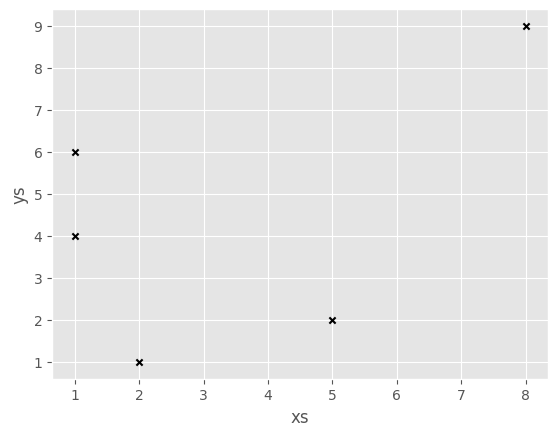

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")

## 24、散点图相关画法

'\n这段代码使用 pandas 库的 plot 方法绘制一个散点图。让我们分解这个代码以更好地理解它的作用。\n\ndf.plot.scatter: 这个操作表示我们要在 DataFrame 上绘制一个散点图。plot.scatter() 方法用于绘制两个变量之间的关系。\n\n"hours_in", "productivity": 这两个参数分别表示散点图的 x 轴和 y 轴数据。在这里，我们使用 DataFrame 中的 \'hours_in\' 列作为 x 轴数据，\'productivity\' 列作为 y 轴数据。\n\ns = df.happiness * 30: 这个参数表示散点的大小。在这里，我们使用 DataFrame 中的 \'happiness\' 列乘以 30 作为散点的大小。这可以帮助我们根据 \'happiness\' 列的值更好地区分不同的数据点。\n\nc = df.caffienated: 这个参数表示散点的颜色。在这里，我们使用 DataFrame 中的 \'caffienated\' 列作为散点的颜色。这可以帮助我们根据 \'caffienated\' 列的值对数据点进行分类。\n'

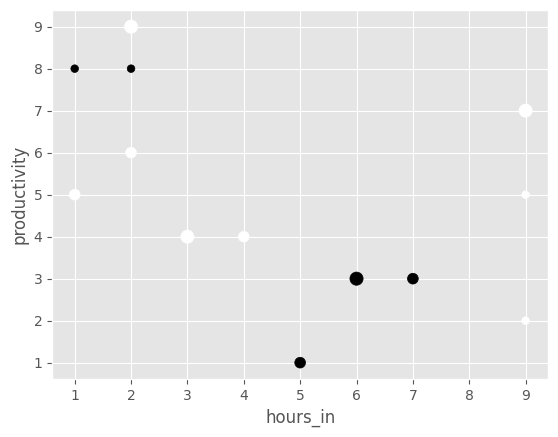

In [45]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

'''
这段代码使用 pandas 库的 plot 方法绘制一个散点图。

df.plot.scatter: 这个操作表示我们要在 DataFrame 上绘制一个散点图。plot.scatter() 方法用于绘制两个变量之间的关系。

"hours_in", "productivity": 这两个参数分别表示散点图的 x 轴和 y 轴数据。在这里，我们使用 DataFrame 中的 'hours_in' 列作为 x 轴数据，'productivity' 列作为 y 轴数据。

s = df.happiness * 30: 这个参数表示散点的大小。在这里，我们使用 DataFrame 中的 'happiness' 列乘以 30 作为散点的大小。这可以帮助我们根据 'happiness' 列的值更好地区分不同的数据点。

c = df.caffienated: 这个参数表示散点的颜色。在这里，我们使用 DataFrame 中的 'caffienated' 列作为散点的颜色。这可以帮助我们根据 'caffienated' 列的值对数据点进行分类。
'''

#### 25、同坐标下画折线图和柱状图

(-1.0, 12.0)

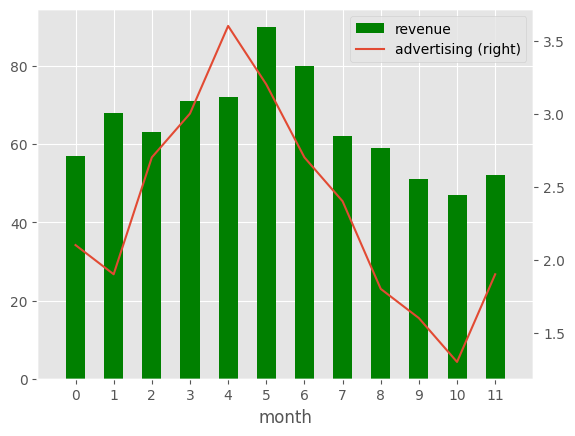

In [46]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))


'''
这段代码使用 pandas 库和 Matplotlib 库创建了一个组合图表，包括一个柱状图和一个折线图。

df = pd.DataFrame(...): 这个代码创建了一个包含 'revenue'（收入）、'advertising'（广告支出）和 'month'（月份）列的 pandas DataFrame。

ax = df.plot.bar("month", "revenue", color="green"): 这个操作在 DataFrame 上绘制一个柱状图，x 轴为 'month'，y 轴为 'revenue'。color="green" 参数设置柱状图的颜色为绿色。

df.plot.line("month", "advertising", secondary_y=True, ax=ax): 这个操作在同一个图表中绘制一个折线图，x 轴为 'month'，y 轴为 'advertising'。secondary_y=True 参数表示这个折线图将使用次要 y 轴，以便在同一张图表上展示两个 y 轴。ax=ax 参数表示我们将在这个柱状图的同一个坐标轴上绘制折线图。

ax.set_xlim((-1, 12)): 这个操作设置 x 轴的显示范围，从 -1 到 12。这可以确保图表中的所有数据点都可见。
'''